In [1]:
import pandas as pd
import numpy as np
import csv
import json 

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [2]:
lista = (3,6,8,56,4,7,8)
with open("data/E06/data_int.txt", 'w') as file:
    for i in lista:
        file.write(str(i)+" ")
        
!cat data/E06/data_int.txt
print("\n")

matrix = np.arange(25.).reshape(5,5)
with open("data/E06/data_float.txt", 'w') as file2:
    for i in matrix:
        file2.write(str(i)+' \n ')
!cat data/E06/data_float.txt
print("\n")  
data=[]
with open("data/E06/data_int.txt", 'r') as file3:
    for i in file3:
        data = i.split(" ")
    with open("data/E06/data_int.txt", 'w') as f:
        for j in data[:-1]:
            f.write(str(j)+",")
!cat data/E06/data_int.txt    

3 6 8 56 4 7 8 

[0. 1. 2. 3. 4.] 
 [5. 6. 7. 8. 9.] 
 [10. 11. 12. 13. 14.] 
 [15. 16. 17. 18. 19.] 
 [20. 21. 22. 23. 24.] 
 

3,6,8,56,4,7,8,

2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [3]:
data = pd.read_json('data/E06/user_data.json')
cct = data['CreditCardType']=='American Express'
with open("data/E06/AmericanExpress.csv", 'w') as file:
    file.write(str(data[cct]))
!cat data/E06/AmericanExpress.csv

      ID               JobTitle                       EmailAddress  \
1      2    Investment  Advisor       Clint_Thorpe5003@bulaffy.com   
11    12         Retail Trainee   Phillip_Carpenter9505@famism.biz   
27    28        Project Manager        Russel_Graves1378@extex.org   
38    39            Stockbroker       Leanne_Newton1268@typill.biz   
56    57         Budget Analyst          Tony_Giles1960@iatim.tech   
61    62           CNC Operator        Owen_Allcott5125@bauros.biz   
67    68        Project Manager           Liam_Lynn3280@kideod.biz   
73    74                Dentist      Regina_Woodcock5820@yahoo.com   
80    81          HR Specialist       Carter_Wallace9614@atink.com   
91    92    Staffing Consultant           Maia_Stark2797@jiman.org   
96    97            Stockbroker          Ciara_Lomax982@bauros.biz   
115  116    Staffing Consultant      Isabel_Ellwood1475@fuliss.net   
147  148           CNC Operator  Abdul_Townend2202@infotech44.tech   
149  150            

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [4]:
data = pd.read_csv('data/E06/mushrooms_categorized.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [5]:
avg = data.groupby('class').mean()
js = avg.to_json()
with open("data/E06/output.json", "w") as output:
    json.dump(js, output)
!cat data/E06/output.json

"{\"cap-shape\":{\"0\":3.2661596958,\"1\":3.4361593463},\"cap-surface\":{\"0\":1.6159695817,\"1\":2.0551583248},\"cap-color\":{\"0\":4.5817490494,\"1\":4.4218590398},\"bruises\":{\"0\":0.6539923954,\"1\":0.1593462717},\"odor\":{\"0\":4.3346007605,\"1\":3.9407558733},\"gill-attachment\":{\"0\":0.9543726236,\"1\":0.9954034729},\"gill-spacing\":{\"0\":0.2851711027,\"1\":0.0286006129},\"gill-size\":{\"0\":0.0684410646,\"1\":0.5679264556},\"gill-color\":{\"0\":6.6226235741,\"1\":2.8636363636},\"stalk-shape\":{\"0\":0.6159695817,\"1\":0.5148110317},\"stalk-root\":{\"0\":1.4980988593,\"1\":0.6925434116},\"stalk-surface-above-ring\":{\"0\":1.7756653992,\"1\":1.3595505618},\"stalk-surface-below-ring\":{\"0\":1.7984790875,\"1\":1.3942798774},\"stalk-color-above-ring\":{\"0\":6.0988593156,\"1\":5.5127681307},\"stalk-color-below-ring\":{\"0\":6.0646387833,\"1\":5.5045965271},\"veil-type\":{\"0\":0.0,\"1\":0.0},\"veil-color\":{\"0\":1.9315589354,\"1\":2.0020429009},\"ring-number\":{\"0\":1.12547528

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [6]:
def convert_code(row):
    result=''
    for i in range(0, len(row), 6):
            word = line[i : i + 6]
            result += str(chr(int(word,2)))
    return result

with open('data/E06/credit_card.dat','rb') as file:
    for line in file:
        print(convert_code(line))
        

7648 5673 3775 2271

3257 8247 3354 2266

2722 0001 4011 6652

0661 3063 3742 3150

0432 1608 1462 4742

5827 2027 8785 7303

5774 8528 2087 1117

8140 1210 6352 2845

5764 1133 7301 7100

6456 1737 4126 6726

1228 8631 7382 0000

7051 0160 5374 3166

0618 3587 1630 6376

1545 5454 7444 5636

6735 3116 3202 6834

7287 5011 1547 8413

7033 2607 3328 4200

2568 5244 1874 5024

1684 2253 7570 7118

0672 2576 0575 6631

6332 8353 8787 1340

1813 3361 1175 4211

2477 6450 8840 2368

5512 3505 2563 1326

3083 7882 0621 0025

4521 5148 8045 0334

7563 3654 8713 5787

8324 2664 0476 5561

0565 2504 7168 3510

5107 5507 1767 0738

2462 1821 2448 1443

2788 0638 6861 6554

5851 5873 5474 0547

0670 1004 4013 2655

5874 5506 3048 0806

2805 5401 8462 1260

5083 8406 6310 1862

1076 1445 3013 2266

8440 4804 4844 5277

4758 6141 0686 1387

7586 0675 0315 2568

2544 1258 7432 5165

3474 5023 4434 5626

1410 0270 0434 5086

7315 4446 1104 4215

0224 7742 8300 0266

0170 2700 3145 0640

2006 2437 805

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

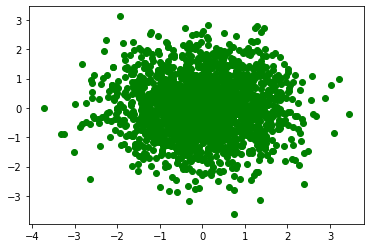

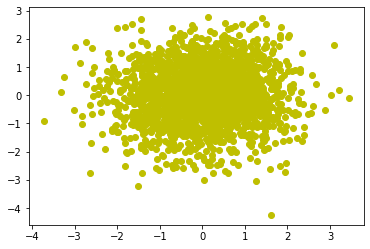

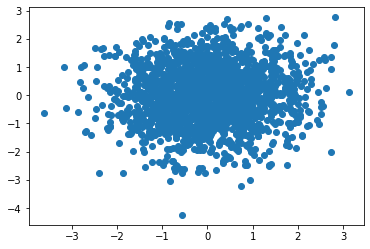

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('data/E06/regression_generated.csv')
features_1 = data['features_1']
features_2 = data['features_2']
features_3 = data['features_3']
plt.scatter(features_1,features_2,c='g') 
plt.show()
plt.scatter(features_1,features_3,c='y') 
plt.show()
plt.scatter(features_2,features_3) 
plt.show()